First, we begin by taking in the dataset and cleaning it up for text mining and sentiment analysis. We will also create a new csv file with the clean data.

In [162]:
# Dataset source: https://jmcauley.ucsd.edu/data/amazon/
import pandas as pd
import nltk
import math
import numpy as np
from numpy import dot
from numpy.linalg import norm
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = CountVectorizer()
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\EthanS\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\EthanS\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [2]:
#Json structure
'''
reviewerID - ID of the reviewer, e.g. A2SUAM1J3GNN3B
asin - ID of the product, e.g. 0000013714
reviewerName - name of the reviewer
vote - helpful votes of the review
style - a disctionary of the product metadata, e.g., "Format" is "Hardcover"
reviewText - text of the review
overall - rating of the product
summary - summary of the review
unixReviewTime - time of the review (unix time)
reviewTime - time of the review (raw)
image - images that users post after they have received the product
'''

'\nreviewerID - ID of the reviewer, e.g. A2SUAM1J3GNN3B\nasin - ID of the product, e.g. 0000013714\nreviewerName - name of the reviewer\nvote - helpful votes of the review\nstyle - a disctionary of the product metadata, e.g., "Format" is "Hardcover"\nreviewText - text of the review\noverall - rating of the product\nsummary - summary of the review\nunixReviewTime - time of the review (unix time)\nreviewTime - time of the review (raw)\nimage - images that users post after they have received the product\n'

In [ ]:
# Convert reviews to all lowercase
def to_lower(text):
    return text.lower()
df.reviewText = df.reviewText.apply(to_lower)

# Remove special characters from reviews
def remove_special_char(text):
    newString = ''
    for i in text:
        if i.isalnum():                     # If character is alphanumeric, keep. Else, add a space
            newString = newString + i
        else:
            newString = newString + ' '
    return newString

# Remove stopwords: https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
def rem_stopwords(text):
    stop_words = set(stopwords.words('english'))
    words = word_tokenize(text)
    newStr = ""
    for w in words : 
        if w not in stop_words :
            newStr += w + " "
    #return [w for w in words if w not in stop_words]
    return newStr

In [ ]:
def getDataFromJson(filename) :
    df = pd.read_json(filename, lines=True)
    df = df.drop(columns=['verified','reviewTime','reviewerID','asin','vote','unixReviewTime','asin','reviewerName'])

    df = df[df['reviewText'].str.split().str.len().gt(5)] # Reviews must have greater than 5 words to perform sentiment analysis

    df.reviewText = df.reviewText.apply(remove_special_char)
    
    df.reviewText = df.reviewText.apply(rem_stopwords)
    
    return df

In [103]:
df = pd.read_json('Movies_and_TV_5.json', lines=True)
df = df.drop(columns=['verified','reviewTime','reviewerID','asin','vote','unixReviewTime','asin','reviewerName'])

df = df[df['reviewText'].str.split().str.len().gt(5)] # Reviews must have greater than 5 words to perform sentiment analysis


df.reviewText = df.reviewText.apply(remove_special_char)


df.reviewText = df.reviewText.apply(rem_stopwords)
# End of data cleaning, clean data set
df.to_csv("clean_data.csv")
df


,overall,style,reviewText,summary
0,5,{'Format:': ' DVD'},watch learn ended state dying country,Excellent Viewing
3,5,{'Format:': ' DVD'},great read much historical info thank,A great read. So much historical info
5,5,{'Format:': ' VHS Tape'},well done video important information american...,Americans should see this.
6,2,{'Format:': ' VHS Tape'},lot information piece coming faster freight tr...,Lots of Info. But Mostly a Right-Wing Agenda P...
7,5,{'Format:': ' DVD'},essential message told society today people cl...,This should be esential reading for everyone i...
...,...,...,...,...
626,1,NaN,taste strictly porn cheaply produced,One Star
627,1,{'Format:': ' DVD'},nothing even remotely scary werewolf overalls ...,YIKES!!
628,1,{'Format:': ' DVD'},bad 3 short story stupid please waste money ti...,One Star
630,1,{'Format:': ' Prime Video'},wanted show parts film high school english cla...,Do not buy this.


In [104]:
# Use overall to classify as positive or negative: 3+ is positive, 1 and 2 are negative
# reviewText is full review, will use for sentiment analysis
# Summary might be useful for EDA? Length of summary with score maybe?
# Style also for EDA

Now, we will perform EDA to better understand our data and find interesting information about our dataset.

<Axes: >

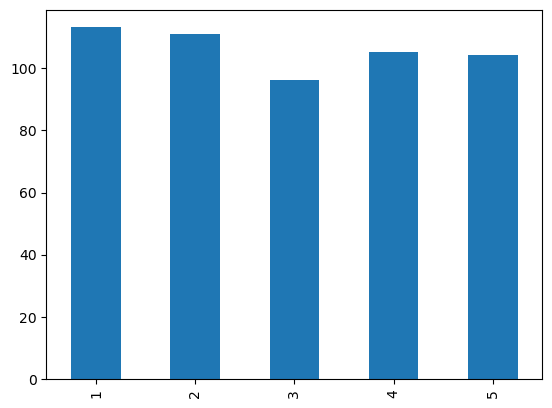

In [105]:
# EDA
pdf = df['overall'].value_counts()
pdf = pdf.reindex(sorted(pdf.index), axis = 1)
pdf.plot.bar()

In [129]:
vectorizer.fit(df['reviewText'])
names = vectorizer.get_feature_names_out()
bag_of_words = vectorizer.fit(df['reviewText'])
bag_of_words = vectorizer.transform(df['reviewText'])

In [175]:
print(bag_of_words[0])

  (0, 1361)	1
  (0, 1850)	1
  (0, 1961)	1
  (0, 3296)	1
  (0, 5383)	1
  (0, 6182)	1


In [176]:
bag_of_words[0].indices

array([1361, 1850, 1961, 3296, 5383, 6182])

In [178]:
bag_of_words[0].data

array([1, 1, 1, 1, 1, 1], dtype=int64)

In [180]:
np.array(bag_of_words[0].indices)

array([1361, 1850, 1961, 3296, 5383, 6182])

In [108]:
vectorizer.vocabulary_.get("learn")

3296

In [132]:
names[3296]

'learn'

In [114]:
tfidfVect = TfidfVectorizer()

In [115]:
tfidf = tfidfVect.fit(df['reviewText'])
tfidf = tfidfVect.transform(df['reviewText'])

In [122]:
print(tfidf[2])

  (0, 6215)	0.24551129359280968
  (0, 6084)	0.3055654059761589
  (0, 3221)	0.28833106327293073
  (0, 2977)	0.48010892906449415
  (0, 2910)	0.42357593350699946
  (0, 1758)	0.3157736959368348
  (0, 325)	0.5035722421674187


In [121]:
tfidfVect.vocabulary_.get("great")

2592

In [133]:
names[325]

'americans'

In [194]:
def getSimilarity(review1, review2) :
    r1 = review1.todense()
    r2 = review2.todense()
    r1 = np.squeeze(np.asarray(r1))
    r2 = np.squeeze(np.asarray(r2))

    return dot(r1, r2) / (norm(r1) * norm(r2))

In [195]:
getSimilarity(bag_of_words[0],bag_of_words[0])

1.0000000000000002

In [228]:
def classify(index) :
    i = 0
    ratings = []
    posScores = 0
    negScores = 0
    
    # Get all similarity scores
    for review in df['reviewText'] :
        if i == index :
            i += 1
            continue
        sim = getSimilarity(bag_of_words[index], bag_of_words[i])
        if sim > 0 :
            #print("Similar found!")
            #print("Sim score ", sim)
            #print(review)
            curRating = df.iloc[i]['overall']
            #print("Rating: ", curRating)
            ratings.append(curRating)
            if curRating < 3.0 :
                negScores += 1
            else :
                posScores += 1
        i += 1
    
    #print("Pos scores: ", posScores)
    #print("Neg scores: ", negScores)
    #print("Scores array : ", ratings)
    avgRating = np.mean(ratings)
    print("Avg rating : ", avgRating)
    
    #print("True rating ", df.iloc[index]['overall'])
    # Now classify the row
    if posScores == negScores or (posScores == 0 and negScores == 0) :
        #print("Cannot classify, unknown")
        return 0
    elif posScores > negScores:
        #print("Classify as positive")
        return 1
    else :
        #print("Classify as negative")
        return -1        

In [234]:
classify(5)

Pos scores:  135
Neg scores:  124
Scores array :  [5, 5, 4, 5, 5, 5, 3, 4, 4, 5, 5, 5, 5, 3, 4, 4, 5, 5, 5, 4, 5, 5, 5, 4, 2, 4, 5, 4, 5, 2, 5, 4, 4, 5, 4, 5, 5, 5, 5, 5, 1, 5, 5, 5, 5, 5, 5, 2, 5, 2, 5, 5, 5, 5, 4, 5, 1, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 4, 4, 5, 3, 4, 4, 2, 4, 4, 4, 4, 3, 4, 4, 3, 3, 2, 4, 2, 4, 4, 3, 4, 3, 1, 4, 2, 4, 4, 4, 4, 4, 3, 4, 3, 3, 2, 4, 3, 4, 3, 4, 2, 2, 4, 4, 4, 4, 4, 3, 4, 1, 1, 1, 1, 1, 4, 4, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 1, 1, 3, 3, 1, 3, 2, 1, 2, 2, 3, 2, 3, 3, 2, 3, 3, 3, 3, 3, 1, 3, 3, 3, 3, 3, 1, 3, 1, 1, 1, 3, 2, 2, 1, 1, 2, 1, 3, 1, 1, 3, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 2, 2, 2, 1, 1, 1, 2, 2, 1, 2, 1, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1]
Avg rating :  2.806949806949807
True rating  4
Classify as positive


1

In [235]:
i = 0
for review in df['reviewText'] :
    trueRating = df.iloc[i]['overall']
    ratingType = 1
    correct = 0
    incorrect = 0
    if trueRating < 3.0 :
        ratingType = -1
    if ratingType == classify(i) :
        print("Correct classification!")
        correct += 1
    else :
        print("Wrong classification")
        incorrect += 1
print("Correct: ", correct, " Incorrect: ", incorrect)
accuracy = correct / (correct + incorrect)
print("Accuracy: ",  accuracy)
        
        

Pos scores:  48
Neg scores:  43
Scores array :  [5, 5, 4, 5, 4, 5, 5, 5, 5, 5, 4, 5, 5, 5, 5, 5, 4, 5, 4, 5, 4, 4, 4, 2, 4, 4, 3, 2, 4, 4, 4, 4, 1, 4, 1, 4, 3, 4, 4, 4, 4, 3, 3, 2, 1, 3, 3, 3, 1, 3, 3, 3, 3, 2, 1, 1, 1, 3, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1]
Avg rating :  2.8241758241758244
True rating  5
Classify as positive
Correct classification!
Pos scores:  48
Neg scores:  43
Scores array :  [5, 5, 4, 5, 4, 5, 5, 5, 5, 5, 4, 5, 5, 5, 5, 5, 4, 5, 4, 5, 4, 4, 4, 2, 4, 4, 3, 2, 4, 4, 4, 4, 1, 4, 1, 4, 3, 4, 4, 4, 4, 3, 3, 2, 1, 3, 3, 3, 1, 3, 3, 3, 3, 2, 1, 1, 1, 3, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1]
Avg rating :  2.8241758241758244
True rating  5
Classify as positive
Correct classification!
Pos scores:  48
Neg scores:  43
Scores array :  [5, 5, 4, 5, 4, 5, 5, 5, 5, 5, 4, 5, 5, 5, 5, 5, 4, 5, 4, 5, 4, 4, 4, 2, 4, 4, 3, 2, 4, 4, 4, 4, 1, 4, 1, 4, 3, 4, 4, 4, 4

Pos scores:  48
Neg scores:  43
Scores array :  [5, 5, 4, 5, 4, 5, 5, 5, 5, 5, 4, 5, 5, 5, 5, 5, 4, 5, 4, 5, 4, 4, 4, 2, 4, 4, 3, 2, 4, 4, 4, 4, 1, 4, 1, 4, 3, 4, 4, 4, 4, 3, 3, 2, 1, 3, 3, 3, 1, 3, 3, 3, 3, 2, 1, 1, 1, 3, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1]
Avg rating :  2.8241758241758244
True rating  5
Classify as positive
Correct classification!
Pos scores:  48
Neg scores:  43
Scores array :  [5, 5, 4, 5, 4, 5, 5, 5, 5, 5, 4, 5, 5, 5, 5, 5, 4, 5, 4, 5, 4, 4, 4, 2, 4, 4, 3, 2, 4, 4, 4, 4, 1, 4, 1, 4, 3, 4, 4, 4, 4, 3, 3, 2, 1, 3, 3, 3, 1, 3, 3, 3, 3, 2, 1, 1, 1, 3, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1]
Avg rating :  2.8241758241758244
True rating  5
Classify as positive
Correct classification!
Pos scores:  48
Neg scores:  43
Scores array :  [5, 5, 4, 5, 4, 5, 5, 5, 5, 5, 4, 5, 5, 5, 5, 5, 4, 5, 4, 5, 4, 4, 4, 2, 4, 4, 3, 2, 4, 4, 4, 4, 1, 4, 1, 4, 3, 4, 4, 4, 4

Pos scores:  48
Neg scores:  43
Scores array :  [5, 5, 4, 5, 4, 5, 5, 5, 5, 5, 4, 5, 5, 5, 5, 5, 4, 5, 4, 5, 4, 4, 4, 2, 4, 4, 3, 2, 4, 4, 4, 4, 1, 4, 1, 4, 3, 4, 4, 4, 4, 3, 3, 2, 1, 3, 3, 3, 1, 3, 3, 3, 3, 2, 1, 1, 1, 3, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1]
Avg rating :  2.8241758241758244
True rating  5
Classify as positive
Correct classification!
Pos scores:  48
Neg scores:  43
Scores array :  [5, 5, 4, 5, 4, 5, 5, 5, 5, 5, 4, 5, 5, 5, 5, 5, 4, 5, 4, 5, 4, 4, 4, 2, 4, 4, 3, 2, 4, 4, 4, 4, 1, 4, 1, 4, 3, 4, 4, 4, 4, 3, 3, 2, 1, 3, 3, 3, 1, 3, 3, 3, 3, 2, 1, 1, 1, 3, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1]
Avg rating :  2.8241758241758244
True rating  5
Classify as positive
Correct classification!
Pos scores:  48
Neg scores:  43
Scores array :  [5, 5, 4, 5, 4, 5, 5, 5, 5, 5, 4, 5, 5, 5, 5, 5, 4, 5, 4, 5, 4, 4, 4, 2, 4, 4, 3, 2, 4, 4, 4, 4, 1, 4, 1, 4, 3, 4, 4, 4, 4

Pos scores:  48
Neg scores:  43
Scores array :  [5, 5, 4, 5, 4, 5, 5, 5, 5, 5, 4, 5, 5, 5, 5, 5, 4, 5, 4, 5, 4, 4, 4, 2, 4, 4, 3, 2, 4, 4, 4, 4, 1, 4, 1, 4, 3, 4, 4, 4, 4, 3, 3, 2, 1, 3, 3, 3, 1, 3, 3, 3, 3, 2, 1, 1, 1, 3, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1]
Avg rating :  2.8241758241758244
True rating  5
Classify as positive
Correct classification!
Pos scores:  48
Neg scores:  43
Scores array :  [5, 5, 4, 5, 4, 5, 5, 5, 5, 5, 4, 5, 5, 5, 5, 5, 4, 5, 4, 5, 4, 4, 4, 2, 4, 4, 3, 2, 4, 4, 4, 4, 1, 4, 1, 4, 3, 4, 4, 4, 4, 3, 3, 2, 1, 3, 3, 3, 1, 3, 3, 3, 3, 2, 1, 1, 1, 3, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1]
Avg rating :  2.8241758241758244
True rating  5
Classify as positive
Correct classification!
Pos scores:  48
Neg scores:  43
Scores array :  [5, 5, 4, 5, 4, 5, 5, 5, 5, 5, 4, 5, 5, 5, 5, 5, 4, 5, 4, 5, 4, 4, 4, 2, 4, 4, 3, 2, 4, 4, 4, 4, 1, 4, 1, 4, 3, 4, 4, 4, 4

Pos scores:  48
Neg scores:  43
Scores array :  [5, 5, 4, 5, 4, 5, 5, 5, 5, 5, 4, 5, 5, 5, 5, 5, 4, 5, 4, 5, 4, 4, 4, 2, 4, 4, 3, 2, 4, 4, 4, 4, 1, 4, 1, 4, 3, 4, 4, 4, 4, 3, 3, 2, 1, 3, 3, 3, 1, 3, 3, 3, 3, 2, 1, 1, 1, 3, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1]
Avg rating :  2.8241758241758244
True rating  5
Classify as positive
Correct classification!
Pos scores:  48
Neg scores:  43
Scores array :  [5, 5, 4, 5, 4, 5, 5, 5, 5, 5, 4, 5, 5, 5, 5, 5, 4, 5, 4, 5, 4, 4, 4, 2, 4, 4, 3, 2, 4, 4, 4, 4, 1, 4, 1, 4, 3, 4, 4, 4, 4, 3, 3, 2, 1, 3, 3, 3, 1, 3, 3, 3, 3, 2, 1, 1, 1, 3, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1]
Avg rating :  2.8241758241758244
True rating  5
Classify as positive
Correct classification!
Pos scores:  48
Neg scores:  43
Scores array :  [5, 5, 4, 5, 4, 5, 5, 5, 5, 5, 4, 5, 5, 5, 5, 5, 4, 5, 4, 5, 4, 4, 4, 2, 4, 4, 3, 2, 4, 4, 4, 4, 1, 4, 1, 4, 3, 4, 4, 4, 4

Pos scores:  48
Neg scores:  43
Scores array :  [5, 5, 4, 5, 4, 5, 5, 5, 5, 5, 4, 5, 5, 5, 5, 5, 4, 5, 4, 5, 4, 4, 4, 2, 4, 4, 3, 2, 4, 4, 4, 4, 1, 4, 1, 4, 3, 4, 4, 4, 4, 3, 3, 2, 1, 3, 3, 3, 1, 3, 3, 3, 3, 2, 1, 1, 1, 3, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1]
Avg rating :  2.8241758241758244
True rating  5
Classify as positive
Correct classification!
Pos scores:  48
Neg scores:  43
Scores array :  [5, 5, 4, 5, 4, 5, 5, 5, 5, 5, 4, 5, 5, 5, 5, 5, 4, 5, 4, 5, 4, 4, 4, 2, 4, 4, 3, 2, 4, 4, 4, 4, 1, 4, 1, 4, 3, 4, 4, 4, 4, 3, 3, 2, 1, 3, 3, 3, 1, 3, 3, 3, 3, 2, 1, 1, 1, 3, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1]
Avg rating :  2.8241758241758244
True rating  5
Classify as positive
Correct classification!
Pos scores:  48
Neg scores:  43
Scores array :  [5, 5, 4, 5, 4, 5, 5, 5, 5, 5, 4, 5, 5, 5, 5, 5, 4, 5, 4, 5, 4, 4, 4, 2, 4, 4, 3, 2, 4, 4, 4, 4, 1, 4, 1, 4, 3, 4, 4, 4, 4

Pos scores:  48
Neg scores:  43
Scores array :  [5, 5, 4, 5, 4, 5, 5, 5, 5, 5, 4, 5, 5, 5, 5, 5, 4, 5, 4, 5, 4, 4, 4, 2, 4, 4, 3, 2, 4, 4, 4, 4, 1, 4, 1, 4, 3, 4, 4, 4, 4, 3, 3, 2, 1, 3, 3, 3, 1, 3, 3, 3, 3, 2, 1, 1, 1, 3, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1]
Avg rating :  2.8241758241758244
True rating  5
Classify as positive
Correct classification!
Pos scores:  48
Neg scores:  43
Scores array :  [5, 5, 4, 5, 4, 5, 5, 5, 5, 5, 4, 5, 5, 5, 5, 5, 4, 5, 4, 5, 4, 4, 4, 2, 4, 4, 3, 2, 4, 4, 4, 4, 1, 4, 1, 4, 3, 4, 4, 4, 4, 3, 3, 2, 1, 3, 3, 3, 1, 3, 3, 3, 3, 2, 1, 1, 1, 3, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1]
Avg rating :  2.8241758241758244
True rating  5
Classify as positive
Correct classification!
Pos scores:  48
Neg scores:  43
Scores array :  [5, 5, 4, 5, 4, 5, 5, 5, 5, 5, 4, 5, 5, 5, 5, 5, 4, 5, 4, 5, 4, 4, 4, 2, 4, 4, 3, 2, 4, 4, 4, 4, 1, 4, 1, 4, 3, 4, 4, 4, 4

Pos scores:  48
Neg scores:  43
Scores array :  [5, 5, 4, 5, 4, 5, 5, 5, 5, 5, 4, 5, 5, 5, 5, 5, 4, 5, 4, 5, 4, 4, 4, 2, 4, 4, 3, 2, 4, 4, 4, 4, 1, 4, 1, 4, 3, 4, 4, 4, 4, 3, 3, 2, 1, 3, 3, 3, 1, 3, 3, 3, 3, 2, 1, 1, 1, 3, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1]
Avg rating :  2.8241758241758244
True rating  5
Classify as positive
Correct classification!
Pos scores:  48
Neg scores:  43
Scores array :  [5, 5, 4, 5, 4, 5, 5, 5, 5, 5, 4, 5, 5, 5, 5, 5, 4, 5, 4, 5, 4, 4, 4, 2, 4, 4, 3, 2, 4, 4, 4, 4, 1, 4, 1, 4, 3, 4, 4, 4, 4, 3, 3, 2, 1, 3, 3, 3, 1, 3, 3, 3, 3, 2, 1, 1, 1, 3, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1]
Avg rating :  2.8241758241758244
True rating  5
Classify as positive
Correct classification!
Pos scores:  48
Neg scores:  43
Scores array :  [5, 5, 4, 5, 4, 5, 5, 5, 5, 5, 4, 5, 5, 5, 5, 5, 4, 5, 4, 5, 4, 4, 4, 2, 4, 4, 3, 2, 4, 4, 4, 4, 1, 4, 1, 4, 3, 4, 4, 4, 4

Pos scores:  48
Neg scores:  43
Scores array :  [5, 5, 4, 5, 4, 5, 5, 5, 5, 5, 4, 5, 5, 5, 5, 5, 4, 5, 4, 5, 4, 4, 4, 2, 4, 4, 3, 2, 4, 4, 4, 4, 1, 4, 1, 4, 3, 4, 4, 4, 4, 3, 3, 2, 1, 3, 3, 3, 1, 3, 3, 3, 3, 2, 1, 1, 1, 3, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1]
Avg rating :  2.8241758241758244
True rating  5
Classify as positive
Correct classification!
Pos scores:  48
Neg scores:  43
Scores array :  [5, 5, 4, 5, 4, 5, 5, 5, 5, 5, 4, 5, 5, 5, 5, 5, 4, 5, 4, 5, 4, 4, 4, 2, 4, 4, 3, 2, 4, 4, 4, 4, 1, 4, 1, 4, 3, 4, 4, 4, 4, 3, 3, 2, 1, 3, 3, 3, 1, 3, 3, 3, 3, 2, 1, 1, 1, 3, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1]
Avg rating :  2.8241758241758244
True rating  5
Classify as positive
Correct classification!
Pos scores:  48
Neg scores:  43
Scores array :  [5, 5, 4, 5, 4, 5, 5, 5, 5, 5, 4, 5, 5, 5, 5, 5, 4, 5, 4, 5, 4, 4, 4, 2, 4, 4, 3, 2, 4, 4, 4, 4, 1, 4, 1, 4, 3, 4, 4, 4, 4

KeyboardInterrupt: 